**NECESSSARY IMPORTS**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

**Download NLTK resources**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Preprocess text: Tokenize, remove stopwords, and lemmatize**

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [WordNetLemmatizer().lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]


**Extract relevant skills based on job keywords**

In [ ]:
def extract_skills(resume_text, job_keywords):
    return [word for word in preprocess_text(resume_text) if word in job_keywords]

**Calculate similarity score based on keyword matches**

In [ ]:
def calculate_similarity(found_skills, job_keywords):
    return len(set(found_skills).intersection(set(job_keywords))) / len(job_keywords)

**Evaluate resume based on similarity scoret**

In [ ]:
def evaluate_resume(similarity_score, threshold=0.4):
    return "Selected" if similarity_score >= threshold else "Not Selected"

**Function to read resume from a file**

In [ ]:
def read_resume_from_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

 **Function to extract keywords from the job description**

In [ ]:
def extract_keywords_from_job_description(file_path):
    resume_text = read_resume_from_file(file_path)
    keywords = preprocess_text(resume_text)
    return list(set(keywords))


**Sample data**

In [ ]:
job_keywords = extract_keywords_from_job_description('file.txt')  # Path to your job description file
resumes = {'resume_id': [1, 2, 3],
           'resume_text': [
               "Experienced in Python and SQL, with a strong background in data analysis and machine learning.",
               "Skilled in communication and teamwork, proficient in SQL and leadership.",
               "Knowledgeable in C++, data structures, and data analysis, with some experience in Python."
           ]}

df = pd.DataFrame(resumes)

**Process each resume**

In [ ]:
df['skills_found'] = df['resume_text'].apply(lambda x: extract_skills(x, job_keywords))
df['similarity_score'] = df['skills_found'].apply(lambda x: calculate_similarity(x, job_keywords))
df['status'] = df['similarity_score'].apply(lambda x: evaluate_resume(x))


**Print resume status in a clean tabular format**

In [ ]:
headers = ["Resume ID", "Skills Found", "Similarity Score", "Status"]
table_data = df[['resume_id', 'skills_found', 'similarity_score', 'status']].values.tolist()
print(tabulate(table_data, headers, tablefmt="fancy_grid"))

╒═════════════╤══════════════════════════════════════════╤════════════════════╤══════════════╕
│   Resume ID │ Skills Found                             │   Similarity Score │ Status       │
╞═════════════╪══════════════════════════════════════════╪════════════════════╪══════════════╡
│           1 │ ['python', 'sql', 'machine', 'learning'] │           0.571429 │ Selected     │
├─────────────┼──────────────────────────────────────────┼────────────────────┼──────────────┤
│           2 │ ['communication', 'sql']                 │           0.285714 │ Not Selected │
├─────────────┼──────────────────────────────────────────┼────────────────────┼──────────────┤
│           3 │ ['python']                               │           0.142857 │ Not Selected │
╘═════════════╧══════════════════════════════════════════╧════════════════════╧══════════════╛


**Bar chart for resume selection status**

In [ ]:
def plot_bar_chart(df):
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    palette = {"Selected": "#5cb85c", "Not Selected": "#d9534f"}

    # Updated to assign 'status' to 'hue' to avoid warning
    bar_chart = sns.countplot(x='status', data=df, palette=palette, hue='status')
    bar_chart.set_title("Resume Selection Status", fontsize=18, fontweight='bold')
    bar_chart.set_xlabel("Selection Status", fontsize=14, fontweight='bold')
    bar_chart.set_ylabel("Number of Resumes", fontsize=14, fontweight='bold')

    # Annotating bars
    for p in bar_chart.patches:
        bar_chart.annotate(f'{p.get_height()}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='baseline', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

**Display the bar chart**

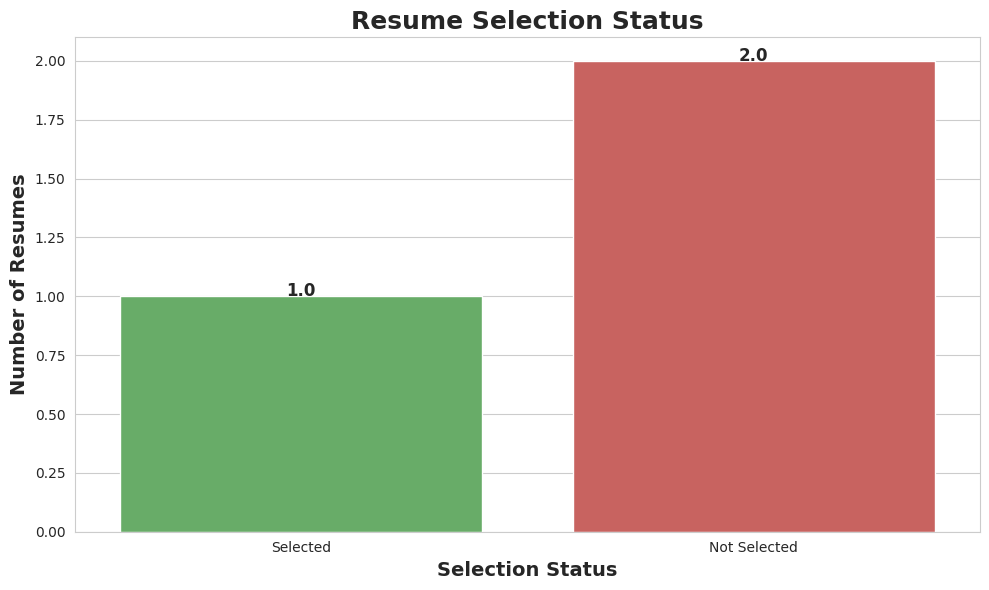

In [ ]:
plot_bar_chart(df)